## Lab 08
### Initial Value Problems
#### Problems of the form: dy/dx = f(x, y), y(x0) = y0

## Euler's method

## Steps
1. Initialization
    Define the intial conditions
    Choose a step size

2. Iterate:
    Compute the slope at current point
    Update the solution Yn+1 = Yn + h.f(xn, yn)
    Advance to the next step: xn+1 = xn + h

Repeat until the stopped condition is reached

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print([1, 2, 3][-1])

3


In [12]:
def euler_method(f, x0, y0, x_end, h):
    x_vals = [x0]
    y_vals = [y0]

    while x_vals[-1] <= x_end:
        y_vals[-1] # most recent y-value
        y_vals.append(y_vals[-1] + h * f(x_vals[-1], y_vals[-1]))
        x_vals.append(x_vals[-1] + h)


    return np.array(x_vals), np.array(y_vals)


In [22]:
f = lambda x, y: x - y
x0 = 0
y0 = 1
h = 0.1

xv, yv = euler_method(f, x0, y0, 2, h)

print(xv, yv)

def exact_solution(x):
    return x - 1 + 2 * np.exp(-x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] [1.         0.9        0.82       0.758      0.7122     0.68098
 0.662882   0.6565938  0.66093442 0.67484098 0.69735688 0.72762119
 0.76485907 0.80837317 0.85753585 0.91178226 0.97060404 1.03354363
 1.10018927 1.17017034 1.24315331]


Text(0.5, 1.0, 'Euler method to approximate a solution for IVP')

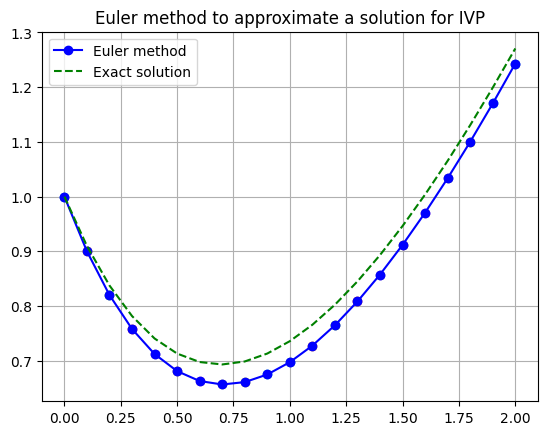

In [25]:
for pt, y in zip(xv, yv):
    plt.plot(pt, y, marker='o')
plt.plot(xv, yv, label="Euler method", color='blue', marker='o')
plt.plot(xv, [exact_solution(x) for x in xv], label="Exact solution", color='green', linestyle='--')

plt.grid()
plt.legend()
plt.title("Euler method to approximate a solution for IVP")

### Runge Kutta Method (RK4)

## Steps
1. Initialization
    Define the initial conditions : x0, y0
    Choose the step size

2. Iteration:
    Compute the intermediate slopes:
        k1 = f(xn, yn)
        k2 = f(xn + h / 2, yn + h / 2 * k1)
        k3 = f(xn + h / 2, yn + h / 2 * k2)
        k4 = f(xn + h, yn + h * k3)

    Update the solution:
        yn+1 = yn + h/6(k1 + 2k2 + 2k3 + k4)

    Advance to the next step
        xn+1 = xn + h

3. Repeat until stopping condition is met

In [27]:
def RK4(f, x0, y0, x_end, h):

    xv = [x0]
    yv = [y0]


    x = x0
    y = y0


    while x <= x_end:
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)

        y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x = x + h

        xv.append(x)
        yv.append(y)
        
    return np.array(xv), np.array(yv)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] [1.         0.909675   0.8374618  0.78163684 0.74064058 0.71306187
 0.69762387 0.69317124 0.69865858 0.71313998 0.73575955 0.76574283
 0.80238908 0.84506423 0.89319455 0.94626093 1.00379362 1.06536761
 1.13059832 1.19913775 1.27067106]


Text(0.5, 1.0, 'Euler method to approximate a solution for IVP')

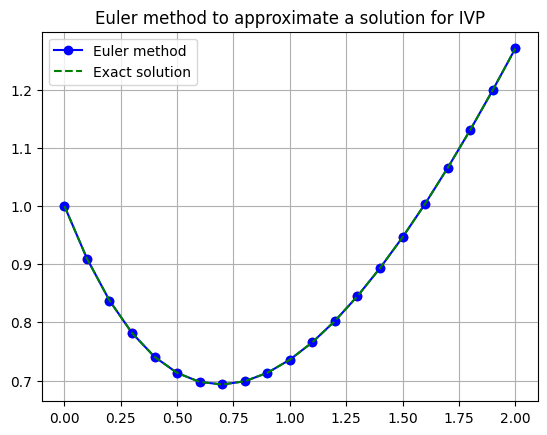

In [28]:
f = lambda x, y: x - y
x0 = 0
y0 = 1
h = 0.1

xv, yv = RK4(f, x0, y0, 2, h)

print(xv, yv)

def exact_solution(x):
    return x - 1 + 2 * np.exp(-x)

for pt, y in zip(xv, yv):
    plt.plot(pt, y, marker='o')
plt.plot(xv, yv, label="Euler method", color='blue', marker='o')
plt.plot(xv, [exact_solution(x) for x in xv], label="Exact solution", color='green', linestyle='--')

plt.grid()
plt.legend()
plt.title("Euler method to approximate a solution for IVP")